# Kaggle Competition: Titanic - Machine Learning from Disaster 
This is my participation in my first Kaggle educational competition.

## Question and problem definition
**The objective of the competition:** use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. More precisely: The challenge is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

**Some background for the problem:**


*   On April 15, 1912, during her maiden voyage, the Titanic (the 'unsinkable') sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Thus only 32 % of its passengers survived.
*  One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 
*  Women and children were more likely to survive because of the "women and children first" protocol for loading lifeboats. But probably also luck was involved in the process.



## Importing needed libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Accuiring data

In [34]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Checking data and initial research



### Features available on the dataset
The feature names are described on the [Kaggle data page here](https://www.kaggle.com/c/titanic/data).


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Categorical features:** Survived, Pclass, Sex, Embarked

**Numerical features:** Continuous: Age, Fare, Discrete: SibSp, Parch

**Mixed type features:** Ticket, Cabin (both contain numbers and letters)

**Name** feature also contains title of the person like Mr., Mrs., Miss., etc.


#### Which features contain blank, null or empty values? 

In [4]:
train_df.info()
print("-"*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

**These will require correcting:** Age, Cabin and embarked in the training dataset. Age, Cabin and Fare in the test set. 

#### What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- At least 25% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers paying as high as 512. (I am not sure if prizes are in USD or British pounds.)

#### What is the distribution of categorical features?

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leyson, Mr. Robert William Norman",male,1601,B96 B98,S
freq,1,577,7,4,644



- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Initial assumptions based on data analysis so far


**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project to check if our model is reasonable.

**Completing**

1. The Age feature needs completing because it is definitely correlated to survival.
2. The Embarked feature  may also needs completing because it might correlate with survival or other features. For example if from one port came in mostly 1st class passengers then it would show up.

**Correcting**

1. The Ticket feature will be dropped from analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival. And as a mixed type feature (contains both letters and numbers) quite difficult to handle.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**

1. It might be good idea to create a new feature called Family based on Parch and SibSp to get total count of family members on board.


**Classifying**

Based on the problem description noted earlier and before hand knowledge we have these assumptions.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

### Pclass

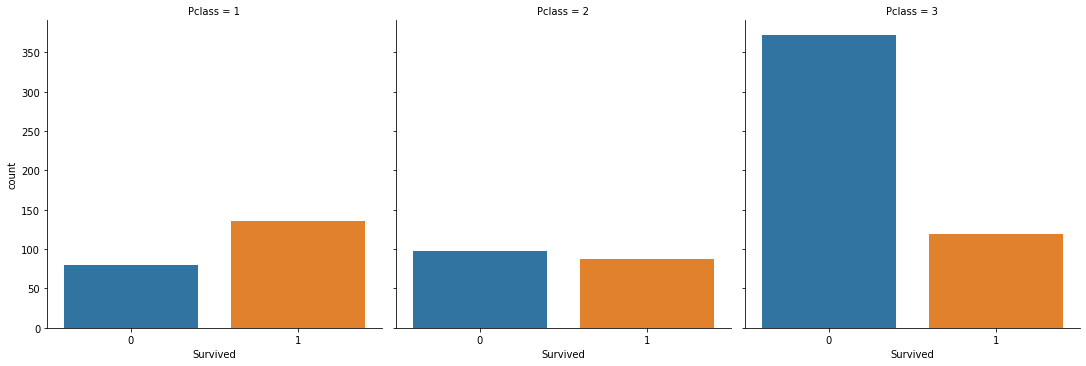

In [10]:
sb.catplot(x = "Survived", col = "Pclass", col_wrap = 3, data = train_df, kind = "count")
plt.show();

Seems that in the 1st class over 50 % survived. In the 2nd class just below 50 % survived and if you were a passenger in the 3rd class you have the smallest change of surviving. So the Pclass absolutely effects whether you survive or not.

### Sex

In [11]:
train_df[['Sex']].value_counts()

Sex   
male      577
female    314
dtype: int64

In [12]:
women = train_df[train_df.Sex == 'female']['Survived']
men = train_df[train_df.Sex == 'male']['Survived']
print("From women " + str(round(women.sum()*100/women.count(),2)) + " % survived.")
print("From men " + str(round(men.sum()*100/men.count(),2)) + " % survived.")

From women 74.2 % survived.
From men 18.89 % survived.


Interesting to see that most of the women survived whereas most of the men did not. Was it like in that Titanic movie that heroic males make sure that their beloved ones survive?

Let just for curiosity reasons see does this differ from passenger class to other.

In [14]:
women_class1 = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)]['Survived']
women_class2 = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 2)]['Survived']
women_class3 = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 3)]['Survived']

print( "In passenger class 1 where " + str(round(women_class1.count()*100/women.count(),2)) + " % of women.")
print( "In passenger class 2 where " + str(round(women_class2.count()*100/women.count(),2)) + " % of women.")
print( "In passenger class 3 where " + str(round(women_class3.count()*100/women.count(),2)) + " % of women.")
print("\n")
print("In passenger class 1 " + str(round(women_class1.sum()*100/women_class1.count(), 2)) + " % of its women survived."  )
print("In passenger class 2 " + str(round(women_class2.sum()*100/women_class2.count(), 2)) + " % of its women survived."  )
print("In passenger class 3 " + str(round(women_class3.sum()*100/women_class3.count(), 2)) + " % of its women survived."  )

In passenger class 1 where 29.94 % of women.
In passenger class 2 where 24.2 % of women.
In passenger class 3 where 45.86 % of women.


In passenger class 1 96.81 % of its women survived.
In passenger class 2 92.11 % of its women survived.
In passenger class 3 50.0 % of its women survived.


It seems that in passenger classes 1 and 2 the males made sure that the women survived. And for the women in passenger class 3 it really wasn't that easy. Anyway sex is also a variable that effects whether you survived or not.

### Age


The age information is missing from 177 passangers. I would think that age is significant contributor for surviving. Let see different age groups in more detail. 

In [15]:
age_groups = []

for i in range(1,16):
  age_groups.append(str(i*5+1) + ' - ' + str(i*5+5) + ' years')
age_study = pd.DataFrame(index = age_groups)
age_study['Frequency'] = [train_df[(train_df.Age < (i*5+6)) & (train_df.Age >= (i*5+1))]['Age'].size for i in range(1,16)]
age_study['Frequency %'] = round(age_study['Frequency']*100/891, 2)
age_study['Survived'] = [train_df[(train_df.Age < (i*5+6)) & (train_df.Age >= (i*5+1))]['Survived'].sum() for i in range(1,16)]
age_study['Survived %'] = round(age_study['Survived']*100/age_study['Frequency'],2)

age_smallchilds = pd.DataFrame(index = ['0 - 5 years'])
age_smallchilds['Frequency'] = [train_df[train_df.Age < 6]['Age'].size]
age_smallchilds['Frequency %'] = round(age_smallchilds['Frequency']*100/891, 2)
age_smallchilds['Survived'] = [train_df[train_df.Age < 6]['Survived'].sum()]
age_smallchilds['Survived %'] = round(age_smallchilds['Survived']*100/age_smallchilds['Frequency'],2)

no_age = pd.DataFrame(index = ['No Age Info'])
no_age['Frequency'] = [train_df[train_df.Age.isna()]['Age'].size]
no_age['Frequency %'] = round(no_age['Frequency']*100/891, 2)
no_age['Survived'] = [train_df[train_df.Age.isna()]['Survived'].sum()]
no_age['Survived %'] = round(no_age['Survived']*100/no_age['Frequency'],2)

age_study = pd.concat([age_smallchilds, age_study, no_age])
age_study

,Frequency,Frequency %,Survived,Survived %
0 - 5 years,44,4.94,31,70.45
6 - 10 years,20,2.24,7,35.00
11 - 15 years,19,2.13,11,57.89
16 - 20 years,97,10.89,33,34.02
21 - 25 years,121,13.58,42,34.71
26 - 30 years,110,12.35,42,38.18
31 - 35 years,86,9.65,41,47.67
36 - 40 years,69,7.74,28,40.58
41 - 45 years,47,5.27,17,36.17
46 - 50 years,37,4.15,16,43.24


In [16]:
age_study[['Frequency']].sum() # Checking that all dataset entries got counted.

Frequency    891
dtype: int64

It seems that the oldest passanger survived (outlier that I think is best to remove when the model is being constructed) and also the very young children were helped so that they will survive. So age is also a variable that effects to the surviving.

The group of people for which there is not age information is quite large. These need to be corrected with care. I think since the age is quite close to the normal distribution, the filling values should also be varying like normal distribution.

### SibSp (number of siblings or spouses aboard) 

In [17]:
train_df[['SibSp']].value_counts()

SibSp
0        608
1        209
2         28
4         18
3         16
8          7
5          5
dtype: int64

In [18]:
for i in range(9):
    alives = len(train_df[(train_df['SibSp'] == i) & (train_df['Survived'] == 1)])
    deads = len(train_df[(train_df['SibSp'] == i) & (train_df['Survived'] == 0)])
    if deads + alives != 0:
      survival_rate = round(alives*100/(alives + deads), 2)
    else:
      survival_rate = "No passengers with this SibSp"
    print(f"SibSp = {i}: Survived {alives}, Died {deads}, Survival rate : {survival_rate} %")

SibSp = 0: Survived 210, Died 398, Survival rate : 34.54 %
SibSp = 1: Survived 112, Died 97, Survival rate : 53.59 %
SibSp = 2: Survived 13, Died 15, Survival rate : 46.43 %
SibSp = 3: Survived 4, Died 12, Survival rate : 25.0 %
SibSp = 4: Survived 3, Died 15, Survival rate : 16.67 %
SibSp = 5: Survived 0, Died 5, Survival rate : 0.0 %
SibSp = 6: Survived 0, Died 0, Survival rate : No passengers with this SibSp %
SibSp = 7: Survived 0, Died 0, Survival rate : No passengers with this SibSp %
SibSp = 8: Survived 0, Died 7, Survival rate : 0.0 %


This value seems also effecting the survival rate.

### Parch (number of parents or children aboard)
So other number looking for the family size.

In [19]:
train_df[['Parch']].value_counts()

Parch
0        678
1        118
2         80
5          5
3          5
4          4
6          1
dtype: int64

In [21]:
for i in range(7):
    alives = len(train_df[(train_df['Parch'] == i) & (train_df['Survived'] == 1)])
    deads = len(train_df[(train_df['Parch'] == i) & (train_df['Survived'] == 0)])
    if deads + alives != 0:
      survival_rate = round(alives*100/(alives + deads), 2)
    else:
      survival_rate = "No passengers with this Parch"
    print(f"Parch = {i}: Survived {alives}, Died {deads}, Survival rate : {survival_rate} %")

Parch = 0: Survived 233, Died 445, Survival rate : 34.37 %
Parch = 1: Survived 65, Died 53, Survival rate : 55.08 %
Parch = 2: Survived 40, Died 40, Survival rate : 50.0 %
Parch = 3: Survived 3, Died 2, Survival rate : 60.0 %
Parch = 4: Survived 0, Died 4, Survival rate : 0.0 %
Parch = 5: Survived 1, Died 4, Survival rate : 20.0 %
Parch = 6: Survived 0, Died 1, Survival rate : 0.0 %


It seems also effecting the surviving. Without parents or children you were more likely to die.

### Fare

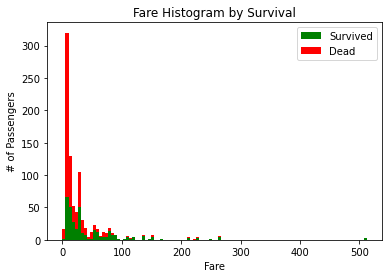

In [22]:
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'], bins = 100)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

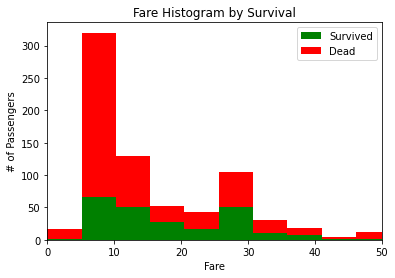

In [23]:
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'], bins = 100)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.xlim(left = 0, right = 50)
plt.legend()

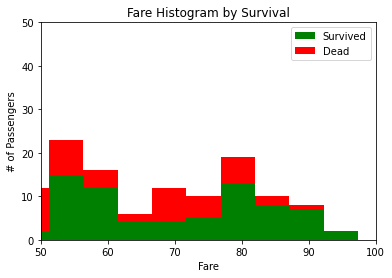

In [24]:
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'], bins = 100)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.xlim(left = 50, right = 100)
plt.ylim(top = 50)
plt.legend()

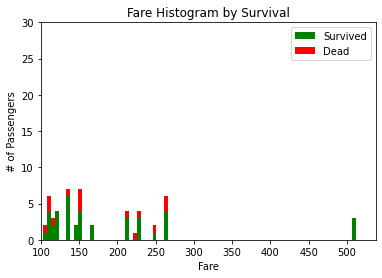

In [25]:
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'], bins = 100)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.xlim(left = 100)
plt.ylim(top=30)
plt.legend()

It seems that if the ticket price is over 50 then you were more likely to survive. And top of that there are 3 who had paid over 500 for their tickets. Probably they had a some kind fancier suite.

### Cabin
This in formation is available only for 204 passengers so I will ignore it. 

### Embarked
C = Cherbourg, Q = Queenstown, S = Southampton

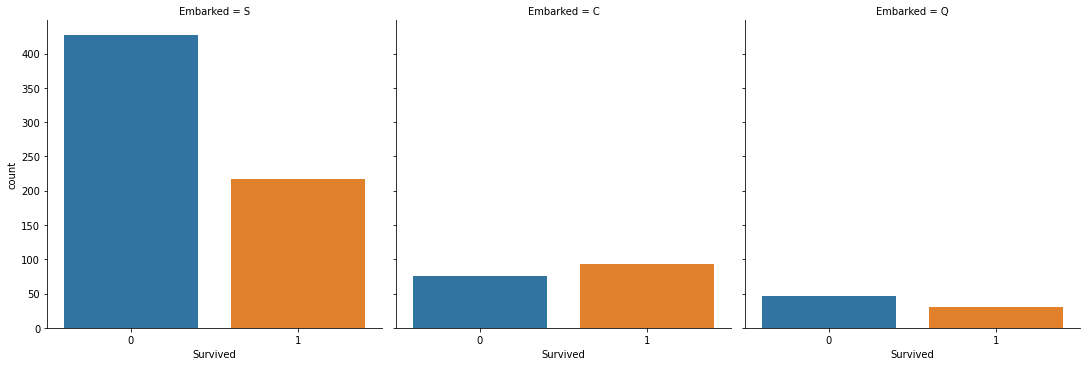

In [26]:
sb.catplot(x = "Survived", col = "Embarked", col_wrap = 3, data = train_df, kind = "count")
plt.show();

Seems that if you embarked from Southampton you were more likely to not survive. Is this because of the PClass?

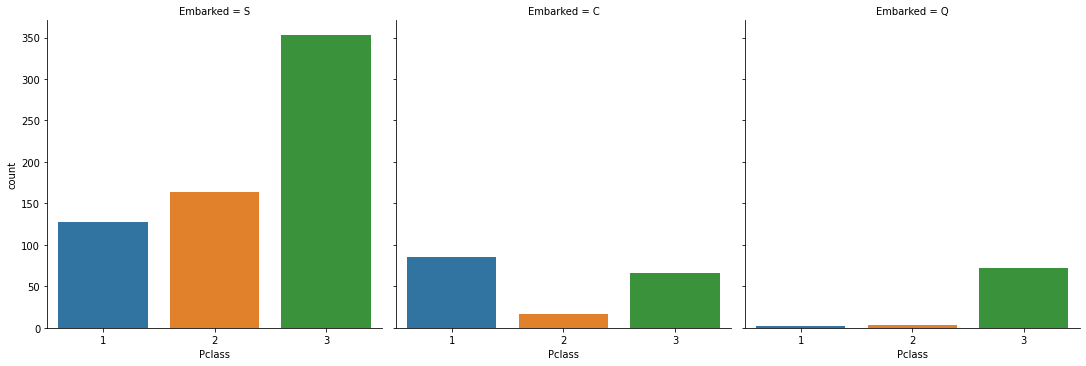

In [27]:
sb.catplot(x = "Pclass", col = "Embarked", col_wrap = 3, data = train_df, kind = "count")
plt.show();

## Preprocessing data
Things to do:
1. Remove unnecessary columns: PassengerID, Name, Cabin and Ticket.
2. Combine SibSp and Parch to one FamilySize feature.
3. Remove clear outliers from train_df (like that 80 year old survivor, and the three that paid very much for their ticket). 
4. Replace the missing Embarked (2 values in train_df) with most common Embarked value (S).
5. Replace missing ages in train_df and in test_df using random values from the normal distribution around the average.
6. Change Embarked and Sex to dummy variables.


In [35]:
#removing unnecessary columns
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name','Ticket', 'Cabin'], axis=1) #Here we do not remove PassengerID because it is needed when we submit our results to Kaggle.

In [36]:
#combining SibSp and Parch
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1 # +1 because familysize 0 for singles sounds weird
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1
train_df = train_df.drop(['SibSp', 'Parch'], axis = 1)
test_df = test_df.drop(['SibSp', 'Parch'], axis = 1)

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [38]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,2
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,3


In [40]:
# Filling missing values for Embarked
train_df["Embarked"] = train_df["Embarked"].fillna('S')
train_df[train_df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize


## Checking different classification models

### Logistic regression

### K Nearest neigbours